In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [8]:
# K-nearest neighbors
def knn(x_train , y_train , point , k=5):
    distances = []
    for i in range(x_train.shape[0]):
        x_temp = x_train[i]
        y_temp = y_train[i]
        distances.append((euclidean(point , x_temp),y_temp))

    sorted_distances = sorted(distances, key = lambda x: x[0])
    k_nearest = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest[:,1] ,return_counts=True)
    labels, counts = freq
    index = np.argmax(counts)
#     print(freq,labels , counts, sep = '\n\n')
#     print(freq)
    ans = labels[index]
    arr = np.array([[1,2],[2,3]])

 
  
    return ans

In [5]:
# Acc
def accuracy(X_test , Y_test ,X_train, Y_train,k=5):
    predictions = []
    for point in X_test:
        ans = knn(X_train,Y_train,point)
        predictions.append(ans)
    predictions = np.array(predictions)
    acc = (predictions == Y_test).sum() / Y_test.shape[0]
    return acc





In [31]:
dataset = pd.read_csv("../mnist_data/train.csv")
print(dataset[:10])

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ... 

In [32]:
r = np.random.random((10,10))
print(r)

[[0.53154561 0.83806798 0.93524949 0.68157836 0.19844916 0.54263898
  0.09017344 0.95840052 0.99141625 0.02308805]
 [0.86890886 0.1620872  0.45028654 0.59301143 0.92958828 0.83217345
  0.11677324 0.58616158 0.4700613  0.63328782]
 [0.24167349 0.94568623 0.88127325 0.9325017  0.69128028 0.67154734
  0.5360965  0.36475031 0.26994247 0.808361  ]
 [0.69657332 0.01207882 0.18835848 0.55714847 0.72282136 0.42897859
  0.51297127 0.45773925 0.84007032 0.20558331]
 [0.04451897 0.50165809 0.37837501 0.0411924  0.42763351 0.43779125
  0.84457186 0.39051956 0.12886494 0.0844614 ]
 [0.11672398 0.9182787  0.72007568 0.55179953 0.91816231 0.88755037
  0.86465948 0.44751471 0.1972599  0.96965738]
 [0.36525182 0.08615567 0.50131143 0.35101791 0.71745694 0.77442864
  0.05921941 0.72933357 0.74036592 0.40517144]
 [0.73215045 0.72868626 0.42925186 0.88542049 0.10934284 0.16726067
  0.59490626 0.88808652 0.87383704 0.29984244]
 [0.46326626 0.15386763 0.06569603 0.82931389 0.33895557 0.47856163
  0.02036703

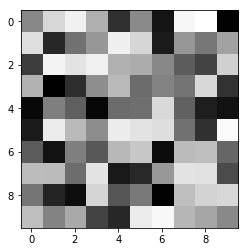

In [33]:
plt.figure()
plt.imshow(r ,cmap='gray')

In [36]:
dataset = dataset.values[:5000] # taken first 5000 only because otherwise it would take much time
print(dataset)
dataset.shape

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


(5000, 785)

In [37]:
X, Y = dataset[:,1:],dataset[:,0]

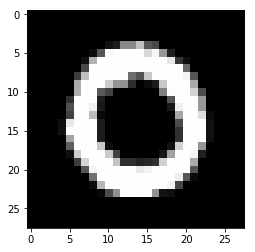

In [41]:
img = np.resize(X[1],(28,28)) #just to see the data
plt.figure()
plt.imshow(img, cmap='gray')

In [42]:
split = int(X.shape[0]*0.8)
X_train , Y_train , X_test, Y_test = X[:split], Y[:split], X[split:], Y[split:]

In [45]:
accuracy(X_test, Y_test, X_train, Y_train, k=5)

0.928